<a href="https://colab.research.google.com/github/Rushikesh-Chavan-777/DeepLearning-Projects/blob/main/StockPricePrediction_usingStackedLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the data reader so as to read large data without downloading it from Tiingo. Tiingo gives some issue. SO I am getting the csv file here!

In [17]:
import pandas as pd
df = pd.read_csv('/content/AAPL.csv')
df.head()
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


#####Processing the data

In [19]:
df1 = df.reset_index()['close']
df1

,close
0,132.045
1,131.780
2,130.280
3,130.535
4,129.960
...,...
1253,314.960
1254,313.140
1255,319.230
1256,316.850


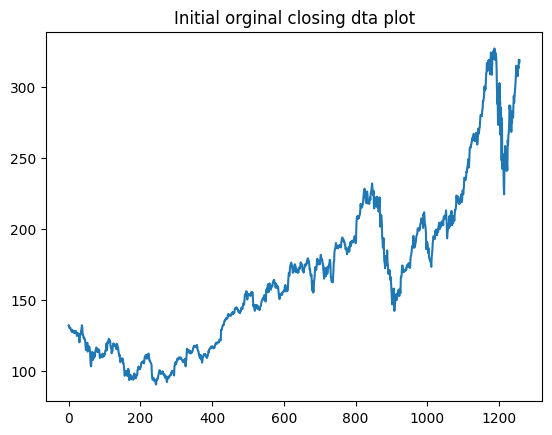

In [24]:
import matplotlib.pyplot as plt
plt.plot(df1)
plt.title("Initial orginal closing dta plot")
plt.show()

In [27]:
##Now, that we are able to visualise the data, we need to scale this between 0 to 1 as it would be convenient for the lSTm stacks

import numpy as np

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [42]:
##now that we have scaled it between 0 and 1, the next step would be..
#...us pliting this data into training and test based on time values
#shall take 65% for train and the rest 35 % for training

training_data = int(len(df1)*0.65)
testing_data = len(df1) - training_data
print((training_data, testing_data))
train_data = df1[0:training_data, :]
test_data = df1[training_data : len(df1), :1]
train_data

(817, 441)


array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [41]:
test_data

array([[0.52651355],
       [0.52837119],
       [0.53119986],
       [0.53871485],
       [0.5461454 ],
       [0.55999324],
       [0.56864815],
       [0.57962509],
       [0.58270708],
       [0.57641645],
       [0.56049987],
       [0.55290045],
       [0.54036139],
       [0.5636663 ],
       [0.55192941],
       [0.57447437],
       [0.56362408],
       [0.53846154],
       [0.53998142],
       [0.54053027],
       [0.54753863],
       [0.53753272],
       [0.55074728],
       [0.55665794],
       [0.54918517],
       [0.56831039],
       [0.5716457 ],
       [0.57806299],
       [0.58659124],
       [0.59837035],
       [0.58114498],
       [0.56552394],
       [0.56332855],
       [0.57641645],
       [0.53204425],
       [0.52398041],
       [0.55632019],
       [0.53626615],
       [0.55648907],
       [0.55243604],
       [0.5306088 ],
       [0.54449886],
       [0.55015621],
       [0.55893777],
       [0.52668243],
       [0.54656759],
       [0.53179093],
       [0.514

In [46]:
#now that we have train and test data set, set create a function to put this in a time_step
#the idea behind this is to give an n number of values and predict the next

def create_timed_data(dataset, time_steps = 1):
  dataX = []
  dataY = []
  for i in range(len(dataset) - time_steps -1):
    a = dataset[i:i+time_steps, 0]
    dataX.append(a)
    dataY.append(dataset[i+time_steps, 0])
  return np.array(dataX), np.array(dataY)

In [47]:
time_steps = 100

X_train, Y_train = create_timed_data(train_data, time_steps)
X_test, Y_test = create_timed_data(test_data, time_steps)

In [50]:
#now, that we finally have the times data of 100 and its next datapoint's out put, lets have a look at this for the train data
X_train

array([[0.17607447, 0.17495567, 0.16862282, ..., 0.09055982, 0.08388922,
        0.09085536],
       [0.17495567, 0.16862282, 0.1696994 , ..., 0.08388922, 0.09085536,
        0.0873934 ],
       [0.16862282, 0.1696994 , 0.16727181, ..., 0.09085536, 0.0873934 ,
        0.09030651],
       ...,
       [0.34801148, 0.32930845, 0.32145571, ..., 0.50042219, 0.50413747,
        0.5062062 ],
       [0.32930845, 0.32145571, 0.32694419, ..., 0.50413747, 0.5062062 ,
        0.51920966],
       [0.32145571, 0.32694419, 0.32230009, ..., 0.5062062 , 0.51920966,
        0.53719497]])

In [51]:
Y_train

array([0.0873934 , 0.09030651, 0.09891919, 0.09887697, 0.10622309,
       0.1213375 , 0.10529427, 0.10221228, 0.12213966, 0.12745926,
       0.1231107 , 0.1302035 , 0.13607194, 0.13366546, 0.1291058 ,
       0.12969687, 0.12762813, 0.1115849 , 0.10879845, 0.1071519 ,
       0.09288187, 0.10062906, 0.09858144, 0.11378029, 0.12007093,
       0.12226632, 0.11572237, 0.12049312, 0.1169045 , 0.11597568,
       0.11804441, 0.11399139, 0.10951617, 0.10495651, 0.1211264 ,
       0.11795998, 0.11774888, 0.10672971, 0.10905176, 0.09642827,
       0.09347294, 0.08507135, 0.08865997, 0.07869628, 0.06624166,
       0.07173014, 0.07130795, 0.07713417, 0.07468547, 0.06957697,
       0.07768302, 0.07168792, 0.0629908 , 0.06337077, 0.05222494,
       0.04373892, 0.02579583, 0.027949  , 0.03457739, 0.04061471,
       0.02976442, 0.03875707, 0.02866672, 0.02668243, 0.02723128,
       0.02516254, 0.04677869, 0.03841932, 0.04074137, 0.01300346,
       0.01583214, 0.02955332, 0.02571139, 0.01747868, 0.02537

In [53]:
#clearly its visible that nextdata point is included in the list after and is the output for that index on the Y_train array

##now, that we have got our proper data, lets get to creating the model
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [54]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [55]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [56]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
#fitting the model

model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=2)

Epoch 1/100
12/12 - 10s - 821ms/step - loss: 0.0159 - val_loss: 0.0626
Epoch 2/100
12/12 - 2s - 203ms/step - loss: 0.0033 - val_loss: 0.0051
Epoch 3/100
12/12 - 3s - 235ms/step - loss: 9.0000e-04 - val_loss: 0.0051
Epoch 4/100
12/12 - 5s - 420ms/step - loss: 7.6958e-04 - val_loss: 0.0051
Epoch 5/100
12/12 - 4s - 375ms/step - loss: 6.8949e-04 - val_loss: 0.0061
Epoch 6/100
12/12 - 3s - 256ms/step - loss: 6.4665e-04 - val_loss: 0.0050
Epoch 7/100
12/12 - 3s - 210ms/step - loss: 6.2606e-04 - val_loss: 0.0056
Epoch 8/100
12/12 - 2s - 197ms/step - loss: 6.5915e-04 - val_loss: 0.0059
Epoch 9/100
12/12 - 3s - 272ms/step - loss: 6.5379e-04 - val_loss: 0.0046
Epoch 10/100
12/12 - 2s - 202ms/step - loss: 6.2232e-04 - val_loss: 0.0043
Epoch 11/100
12/12 - 2s - 191ms/step - loss: 6.4105e-04 - val_loss: 0.0038
Epoch 12/100
12/12 - 2s - 208ms/step - loss: 5.9319e-04 - val_loss: 0.0040
Epoch 13/100
12/12 - 3s - 218ms/step - loss: 6.2347e-04 - val_loss: 0.0049
Epoch 14/100
12/12 - 5s - 402ms/step - lo

In [59]:
##meanwhile as each epoch is training, lets get the code fpr the plot the graphs obtained thereafter

### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


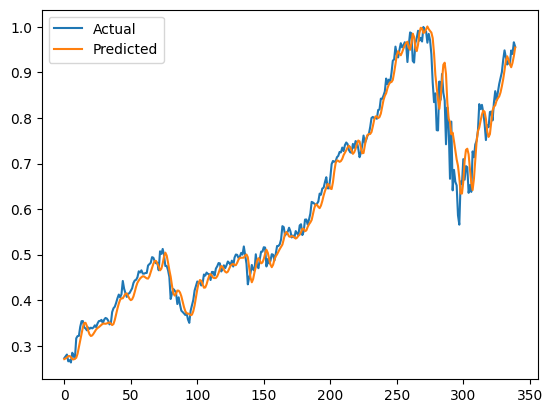

In [65]:
import matplotlib.pyplot as plt

plt.plot(Y_test, label='Actual')
plt.plot(test_predict, label='Predicted')
plt.legend()
plt.show()

In [62]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

0.012487303138414606

In [63]:
### Test Data RMSE
math.sqrt(mean_squared_error(Y_test,test_predict))

0.029889956843237628

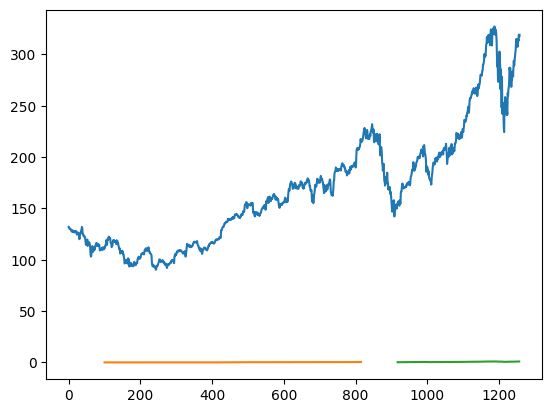

In [64]:
import numpy
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()